# TP6

### `Resolver usando Pandas`

Resolver los ejercicios del TP3 utilizando la librería Pandas.

### Ejercicio 1: Cargar Datos de ventas.

El archivo datos.dat contiene el registro de las ventas realizadas.

Tiene un formato de ancho fijo:
- `fecha`:    10 lugares
- `producto`: 30 lugares
- `precio`:   10 lugares
- `cantidad`:  5 lugares

Hacer una funcion que cargue los datos en un DataFrame de Pandas.

In [43]:
import pandas as pd

def cargar_datos():
    
    colspecs = [(0, 10),  
                (10, 40), 
                (40, 50), 
                (50, 55)] 
    
    
    nombres_columnas = ['fecha', 'producto', 'precio', 'cantidad']
    
   
    df = pd.read_fwf('datos.dat', colspecs=colspecs, header=None, names=nombres_columnas)
    
  
    df['precio'] = pd.to_numeric(df['precio'], errors='coerce')
    df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce')
    
    return df


datos = cargar_datos()


print(datos)

         fecha    producto  precio  cantidad
0   2024-08-27     Mirinda    1510        14
1   2024-08-27     Mirinda    1560        12
2   2024-08-28     Torasso     940         8
3   2024-08-29  Pepsi Cola    1210        10
4   2024-08-30     Mirinda    1520         1
5   2024-09-01     Mirinda    1550        15
6   2024-09-01      Sprite     810         4
7   2024-09-02   Coca Cola    1100         4
8   2024-09-02  Pepsi Cola    1220        13
9   2024-09-02     Torasso     910         5
10  2024-09-02     Torasso     920         3
11  2024-09-03   Coca Cola    1020         8
12  2024-09-03     Mirinda    1570         7
13  2024-09-03     Mirinda    1590         2
14  2024-09-04  Pepsi Cola    1220        13
15  2024-09-05     Mirinda    1500         3
16  2024-09-05  Pepsi Cola    1300         5
17  2024-09-06   Coca Cola    1080         1
18  2024-09-06      Sprite     860        12
19  2024-09-06     Torasso     930         3
20  2024-09-07   Coca Cola    1080        14
21  2024-0

### Ejercicio 2: Calcular el total de ventas.
Hacer una función que sume los importes vendidos (precio * cantidad) y las cantidades.


In [44]:
import pandas as pd

def calcular_totales(datos):
    datos['importe'] = datos['precio'] * datos['cantidad']
    
    total_importe = datos['importe'].sum()
    total_cantidad = datos['cantidad'].sum()
    
    return total_importe, total_cantidad

datos = cargar_datos()
importe, cantidad = calcular_totales(datos)


print(f"Las ventas fueron de ${importe:.2f} en {cantidad} unidades")


Las ventas fueron de $392730.00 en 335 unidades


### Ejercicio 3: Listar las unidades vendidas.
Listar cuántas unidades se vendieron en total para cada producto


In [45]:
import pandas as pd

def unidades_vendidas(datos):
   
    ventas_por_producto = datos.groupby('producto')['cantidad'].sum()

   
    ventas_por_producto = ventas_por_producto.reset_index()

    print("Unidades vendidas por producto:")
    for index, row in ventas_por_producto.iterrows():
        print(f"{row['producto']}: {row['cantidad']} unidades")


datos = cargar_datos()
unidades_vendidas(datos)


Unidades vendidas por producto:
Coca Cola: 57 unidades
Mirinda: 85 unidades
Pepsi Cola: 89 unidades
Sprite: 72 unidades
Torasso: 32 unidades


###  Ejercicio 4: Listar el precio promedio por producto.
Hacer un listado del precio promedio por producto.


In [46]:
def precio_promedio(datos):
    
    promedio_por_producto = datos.groupby('producto')['precio'].mean()
    
 
    promedio_por_producto = promedio_por_producto.reset_index()

   
    print("Precio promedio por producto:")
    for index, row in promedio_por_producto.iterrows():
        print(f"{row['producto']}: ${row['precio']:.2f}")

datos = cargar_datos()
precio_promedio(datos)


Precio promedio por producto:
Coca Cola: $1072.50
Mirinda: $1545.83
Pepsi Cola: $1245.00
Sprite: $841.43
Torasso: $920.00


### Ejercicio 5: Ranking de productos
Realizar un listado de los 3 productos más vendidos ordenados por la cantidad de unidades vendidas (ordenadas de mayor a menor)


In [47]:
import pandas as pd

def cargar_datos():
   
    data = {
        'producto': ['Mirinda', 'Pepsi Cola', 'Coca Cola', 'Torasso', 'Sprite'],
        'unidades_vendidas': [14, 12, 10, 8, 6]
    }
    return pd.DataFrame(data)

def productos_mas_vendidos(datos, top=3):
  
    top_productos = datos.sort_values(by='unidades_vendidas', ascending=False).head(top)
    
    print("Los 3 productos más vendidos son:")
    for index, row in top_productos.iterrows():
        print(f"{row['producto']}: {row['unidades_vendidas']} unidades")


datos = cargar_datos()
productos_mas_vendidos(datos)


Los 3 productos más vendidos son:
Mirinda: 14 unidades
Pepsi Cola: 12 unidades
Coca Cola: 10 unidades


### Ejercicio 6: Listar las ventas por mes
Realizar un listado del total de unidades vendidas por producto separado por mes.


In [48]:
import pandas as pd

def cargar_datos():
    
    data = {
        'fecha': [
            '2024-08-27', '2024-08-27', '2024-08-28', '2024-08-29',
            '2024-08-30', '2024-09-01', '2024-09-01', '2024-09-02',
            '2024-09-02', '2024-09-02', '2024-09-03', '2024-09-03',
            '2024-09-04', '2024-09-05', '2024-09-05', '2024-09-06',
            '2024-09-07', '2024-09-08', '2024-09-08', '2024-09-09',
            '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13',
            '2024-09-14', '2024-09-15'
        ],
        'producto': [
            'Mirinda', 'Mirinda', 'Torasso', 'Pepsi Cola',
            'Mirinda', 'Mirinda', 'Sprite', 'Coca Cola',
            'Pepsi Cola', 'Torasso', 'Coca Cola', 'Mirinda',
            'Pepsi Cola', 'Mirinda', 'Pepsi Cola', 'Coca Cola',
            'Coca Cola', 'Sprite', 'Mirinda', 'Pepsi Cola',
            'Mirinda', 'Sprite', 'Coca Cola', 'Coca Cola',
            'Pepsi Cola', 'Mirinda'
        ],
        'unidades_vendidas': [
            14, 12, 8, 10, 1, 15, 4, 4, 13, 5,
            8, 7, 13, 3, 5, 1, 14, 10, 2, 3,
            8, 12, 4, 5, 15, 13
        ]
    }
    return pd.DataFrame(data)

def total_unidades_por_mes(datos):
    
    datos['fecha'] = pd.to_datetime(datos['fecha'])
    
   
    datos['año_mes'] = datos['fecha'].dt.to_period('M')
    
  
    total = datos.groupby(['año_mes', 'producto'])['unidades_vendidas'].sum().reset_index()
    
    return total


datos = cargar_datos()
resultado = total_unidades_por_mes(datos)

print("Total de unidades vendidas por producto separado por mes:")
print(resultado)

Total de unidades vendidas por producto separado por mes:
   año_mes    producto  unidades_vendidas
0  2024-08     Mirinda                 27
1  2024-08  Pepsi Cola                 10
2  2024-08     Torasso                  8
3  2024-09   Coca Cola                 36
4  2024-09     Mirinda                 48
5  2024-09  Pepsi Cola                 49
6  2024-09      Sprite                 26
7  2024-09     Torasso                  5


### Ejercicio 7: Informe general

Mostrar un listado de productos ordenados alfabeticamente que contengan el precio promedio, la cantidad de unidades vendidas y el importe total vendido para cada producto

In [49]:
import pandas as pd

def cargar_datos():
    
    data = {
        'producto': ['Mirinda', 'Pepsi Cola', 'Coca Cola', 'Torasso', 'Sprite', 'Mirinda', 'Pepsi Cola'],
        'precio': [1.50, 1.80, 1.75, 2.00, 1.60, 1.55, 1.85],
        'unidades_vendidas': [14, 12, 10, 8, 6, 5, 7]
    }
    return pd.DataFrame(data)

def resumen_ventas(datos):
    
    resumen = datos.groupby('producto').agg(
        precio_promedio=('precio', 'mean'),
        total_unidades_vendidas=('unidades_vendidas', 'sum')
    ).reset_index()

    
    resumen['importe_total'] = resumen['precio_promedio'] * resumen['total_unidades_vendidas']
    
    
    resumen = resumen.sort_values(by='producto')
    
    return resumen


datos = cargar_datos()
resultado = resumen_ventas(datos)

print("Resumen de ventas:")
print(resultado)

Resumen de ventas:
     producto  precio_promedio  total_unidades_vendidas  importe_total
0   Coca Cola            1.750                       10         17.500
1     Mirinda            1.525                       19         28.975
2  Pepsi Cola            1.825                       19         34.675
3      Sprite            1.600                        6          9.600
4     Torasso            2.000                        8         16.000


## `Resolver usando NumPy`
## Resolver el ejercicio 2 del tp1 usando NumPy

### Ejercicio 8

Escribe una función en Python que encuentre los valores de `a`, `b`, y `c` para que la función cuadrática `f(x) = a x^2 + b x + c` pase exactamente por los siguientes puntos:

| x  | y  |
|---:|---:|
|  0 |  0 |
|  1 |  8 |
|  2 | 12 |
|  3 | 12 |
|  5 |  0 |

### Requisitos:
- La función debe explorar posibles valores de `a`, `b`, y `c` utilizando un método de prueba y error.
- Debe devolver los valores que hagan que la diferencia entre la función `f(x)` y los valores medidos `y` sea exactamente cero para cada punto.

> **Pista**: Los valores de `a`, `b`, y `c` son números pequeños.

La idea es implementar el mismo algoritmo que se uso en el TP1 pero usando NumPy en lugar de Python puro.

In [50]:
import numpy as np

def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

def encontrar_coeficientes():
    
    puntos_x = np.array([0, 1, 2, 3, 5])
    puntos_y = np.array([0, 8, 12, 12, 0])
    
    rango = np.arange(-10, 11, 1) 

    for a in rango:
        for b in rango:
            for c in rango:
                y_pred = f(puntos_x, [a, b, c])
                if np.all(y_pred == puntos_y): 
                    return a, b, c

    return None  


coeficientes = encontrar_coeficientes()

if coeficientes:
    print(f"Coeficientes encontrados: a = {coeficientes[0]}, b = {coeficientes[1]}, c = {coeficientes[2]}")
else:
    print("No se encontraron coeficientes que cumplan la condición.")

Coeficientes encontrados: a = -2, b = 10, c = 0


### Ejercicio 9: Resolver el ejercicio 3 del TP1 usando NumPy
Buscar los coeficientes de la función que minimice la suma de los cuadrados de las diferencias entre los valores medidos y los valores de la función.

1. Crear un array con los coeficientes elegidos al azar (usar `randint(-10,10,3)`).
2. Calcular el valor de la función y el error correspondiente.
3. Mientras que el error sea mayor a 1:
    1. Definir nuevos coeficientes agregándoles un pequeño valor al azar a los coeficientes actuales (aprendizaje = 0.001).
    2. Si el error para los nuevos coeficientes es menor que el anterior, reemplazar los coeficientes actuales por los nuevos.


In [51]:
import numpy as np
from numpy.random import randint

def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

def error(y, y_pred):
    return np.sum((y - y_pred)**2)

X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 11, 1])  

def buscar_coeficientes():
    
    coeficientes = np.random.randint(-10, 10, 3).astype(float)
    error_actual = error(Y, f(X, coeficientes))

    aprendizaje = 0.001

    while error_actual > 1:  
       
        nuevos_coeficientes = coeficientes + np.random.uniform(-aprendizaje, aprendizaje, 3)
        
       
        error_nuevo = error(Y, f(X, nuevos_coeficientes))

       
        if error_nuevo < error_actual:
            coeficientes = nuevos_coeficientes
            error_actual = error_nuevo

    return coeficientes


coeficientes = buscar_coeficientes()
print(f"Coeficientes encontrados: a = {coeficientes[0]:.2f}, b = {coeficientes[1]:.2f}, c = {coeficientes[2]:.2f}")



Coeficientes encontrados: a = -1.81, b = 9.22, c = 0.08


Coeficientes (a, b, c): [-1.92  9.55  0.18]


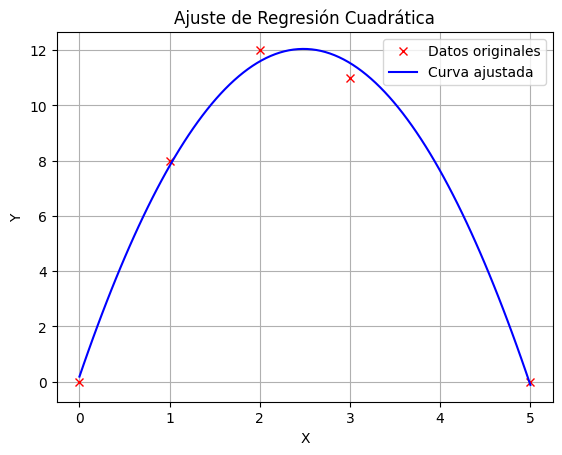

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 11, 0])


coeficientes = np.polyfit(X, Y, 2)
g = np.poly1d(coeficientes)


print("Coeficientes (a, b, c):", np.round(coeficientes, 2))


plt.plot(X, Y, 'rx', label='Datos originales')
plt.grid()


xr = np.linspace(min(X), max(X), 100)

yr = g(xr)


plt.plot(xr, yr, label='Curva ajustada', color='blue')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Regresión Cuadrática')
plt.legend()
plt.show()


In [53]:
def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

X = [0, 1, 2, 3, 5]
Y = [0, 8, 12, 12, 0]
rango = range(-10, 11)


encontrado = False

for a in rango:
    for b in rango:
        for c in rango:
            y = [f(x, [a, b, c]) for x in X]
            if y == Y:
                print(f"Coeficientes encontrados: a = {a}, b = {b}, c = {c}")
                encontrado = True

if not encontrado:
    print("No se encontraron coeficientes que satisfagan la ecuación.")


Coeficientes encontrados: a = -2, b = 10, c = 0


Coeficientes encontrados: a = -2.00, b = 10.00, c = -0.20
Coeficientes usando np.polyfit: [-1.92  9.55  0.18]


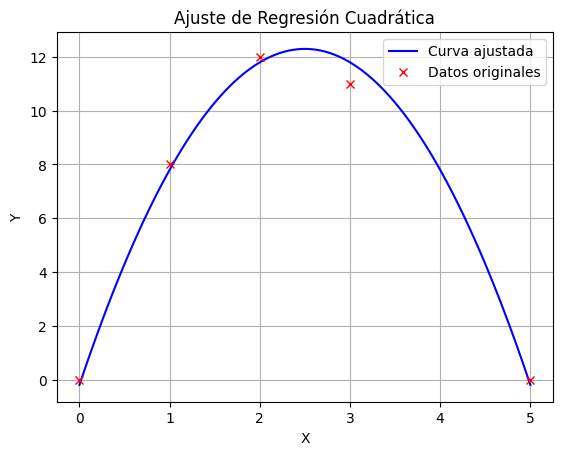

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

def error(y, yp):
    return np.sum((y - yp)**2)

X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 11, 0])
rango = np.arange(-10, 11, 0.2)

e = np.inf
coeficientes = [None, None, None]  

for a in rango:
    for b in rango:
        for c in rango:
            y = f(X, [a, b, c])
            ne = error(Y, y)
            if ne < e:
                e = ne
                coeficientes = [a, b, c]


coeficientes_redondeados = np.round(coeficientes, 2)
print(f"Coeficientes encontrados: a = {coeficientes_redondeados[0]:.2f}, b = {coeficientes_redondeados[1]:.2f}, c = {coeficientes_redondeados[2]:.2f}")


coeficientes_polyfit = np.polyfit(X, Y, 2)
print("Coeficientes usando np.polyfit:", np.round(coeficientes_polyfit, 2))


xr = np.linspace(min(X), max(X), 100)
yr = f(xr, coeficientes)

plt.plot(xr, yr, label='Curva ajustada', color='blue')
plt.plot(X, Y, 'rx', label='Datos originales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Regresión Cuadrática')
plt.legend()
plt.grid()
plt.show()

1000: Error = 12483.47, Coeficientes = [-2.38 -8.79  9.1 ]
2000: Error = 1971.05, Coeficientes = [ 0.14 -8.31  9.2 ]
3000: Error = 395.52, Coeficientes = [ 1.23 -6.95  9.58]
4000: Error = 276.92, Coeficientes = [ 0.77 -4.85 10.1 ]
5000: Error = 193.38, Coeficientes = [ 0.25 -2.63 10.24]
6000: Error = 139.28, Coeficientes = [-0.18 -0.55  9.75]
7000: Error = 98.63, Coeficientes = [-0.55  1.33  8.65]
8000: Error = 69.67, Coeficientes = [-0.8   2.75  7.4 ]
9000: Error = 48.08, Coeficientes = [-0.96  3.83  6.08]
10000: Error = 28.99, Coeficientes = [-1.19  5.15  4.78]
11000: Error = 15.60, Coeficientes = [-1.39  6.35  3.53]
12000: Error = 7.36, Coeficientes = [-1.56  7.4   2.44]
13000: Error = 2.82, Coeficientes = [-1.72  8.34  1.52]
Coeficientes encontrados: a = -1.83, b = 9.00, c = 0.77
Coeficientes usando np.polyfit: [-1.92  9.55  0.18]


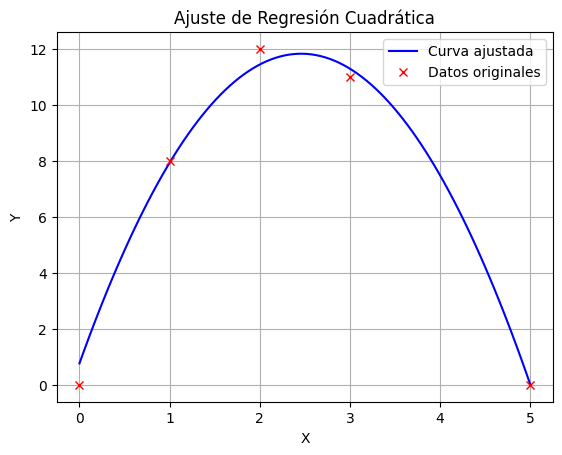

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

def error(y, yp):
    return np.sum((y - yp)**2)

X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 11, 0])
rango = np.arange(-10, 11, 0.2)


e = np.inf
coeficientes = np.random.randint(-10, 10, 3).astype(float)  
aprendizaje = 0.01
n = 0 

while e > 1 and n < 100_000:
    nuevos = coeficientes + aprendizaje * np.random.uniform(-1, 1, 3) 
    y = f(X, nuevos)
    ne = error(Y, y)
    if ne < e:
        e = ne
        coeficientes = nuevos
    n += 1
    if n % 1000 == 0:
        print(f"{n}: Error = {e:.2f}, Coeficientes = {np.round(coeficientes, 2)}") 


print(f"Coeficientes encontrados: a = {coeficientes[0]:.2f}, b = {coeficientes[1]:.2f}, c = {coeficientes[2]:.2f}")
print("Coeficientes usando np.polyfit:", np.round(np.polyfit(X, Y, 2), 2))


xr = np.linspace(min(X), max(X), 100)
yr = f(xr, coeficientes)

plt.plot(xr, yr, label='Curva ajustada', color='blue')
plt.plot(X, Y, 'rx', label='Datos originales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Regresión Cuadrática')
plt.legend()
plt.grid()
plt.show()

10000: Error = 0.59, Coeficientes = [-1.95  9.74 -0.02]
20000: Error = 0.53, Coeficientes = [-1.92  9.56  0.17]
30000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
40000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
50000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
60000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
70000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
80000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
90000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
100000: Error = 0.53, Coeficientes = [-1.92  9.55  0.18]
Coeficientes encontrados: [-1.92  9.55  0.18], Error: 0.53
Coeficientes usando np.polyfit: [-1.92  9.55  0.18]


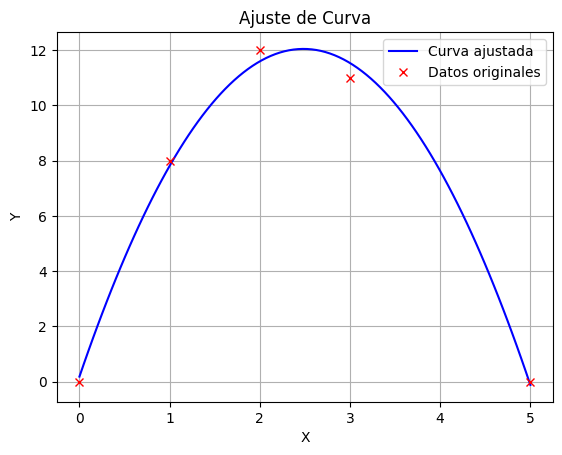

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, coeficientes):
    a, b, c = coeficientes
    return a * x**2 + b * x + c

def error(y, yp):
    return np.sum((y - yp)**2)

X = np.array([0, 1, 2, 3, 5], dtype=float)
Y = np.array([0, 8, 12, 11, 0], dtype=float)


coeficientes = np.random.uniform(-10, 10, 3)  
aprendizaje = 0.001  
n = 0


y = f(X, coeficientes)  

while n < 100_000:
   
    ga = -2 * np.sum((Y - y) * X**2) / len(X)  
    gb = -2 * np.sum((Y - y) * X) / len(X)     
    gc = -2 * np.sum(Y - y) / len(X)            
    gradientes = np.array([ga, gb, gc], dtype=float)  

   
    coeficientes -= gradientes * aprendizaje

    y = f(X, coeficientes)
    n += 1

  
    if n % 10_000 == 0:
        print(f"{n}: Error = {error(Y, y):.2f}, Coeficientes = {np.round(coeficientes, 2)}")


final_error = error(Y, y)
print(f"Coeficientes encontrados: {np.round(coeficientes, 2)}, Error: {final_error:.2f}")
print("Coeficientes usando np.polyfit:", np.round(np.polyfit(X, Y, 2), 2))


xr = np.linspace(min(X), max(X), 100)
yr = f(xr, coeficientes)

plt.plot(xr, yr, label='Curva ajustada', color='blue')
plt.plot(X, Y, 'rx', label='Datos originales')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Curva')
plt.legend()
plt.grid()
plt.show()
